In [14]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# !pip install xgboost
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### Importing dataset

In [15]:
clean_df = pd.read_pickle("../full_dataset.pickle")
clean_df.head()

,cid,inchikey,cmpdname,mw,xlogp,isosmiles,activity,activity_label,graph
0,298,WIIZWVCIJKGZOK-UHFFFAOYSA-N,"2,2-dichloro-N-[1,3-dihydroxy-1-(4-nitrophenyl)propan-2-yl]acetamide",323.13,1.1,C1=CC(=CC=C1C(C(CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-],Inactive,0,<deepchem.feat.mol_graphs.ConvMol object at 0x2b7da88f8730>
1,1318,DGEZNRSVGBDHLK-UHFFFAOYSA-N,"1,10-Phenanthroline",180.20,1.8,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1,Inactive,0,<deepchem.feat.mol_graphs.ConvMol object at 0x2b7e2d024520>
2,1400,ZVPDNRVYHLRXLX-UHFFFAOYSA-N,"1-(tert-Butyl)-3-(p-tolyl)-1H-pyrazolo[3,4-d]pyrimidin-4-amine",281.36,2.8,CC1=CC=C(C=C1)C2=NN(C3=NC=NC(=C23)N)C(C)(C)C,Inactive,0,<deepchem.feat.mol_graphs.ConvMol object at 0x2b7e2d0243d0>
3,1893,PQCAUHUKTBHUSA-UHFFFAOYSA-N,7-Nitroindazole,163.13,1.8,C1=CC2=C(C(=C1)[N+](=O)[O-])NN=C2,Inactive,0,<deepchem.feat.mol_graphs.ConvMol object at 0x2b7e2d01fa00>
4,2082,HXHWSAZORRCQMX-UHFFFAOYSA-N,Albendazole,265.33,2.9,CCCSC1=CC2=C(C=C1)N=C(N2)NC(=O)OC,Active,1,<deepchem.feat.mol_graphs.ConvMol object at 0x2b7e2d028160>


#### Using isosmiles to get Morgan fingerprint

In [16]:
data_initial = clean_df[["isosmiles","activity_label"]]

In [17]:
data_initial['molecule'] = data_initial["isosmiles"].apply(lambda x : Chem.MolFromSmiles(x))

[15:11:12] WARNING: not removing hydrogen atom without neighbors
[15:11:25] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_31112/156204110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_initial['molecule'] = data_initial["isosmiles"].apply(lambda x : Chem.MolFromSmiles(x))


In [18]:
data_initial["Morgan_fp"] = data_initial["molecule"].apply(
    lambda x : rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius = 4, nBits = 250, useFeatures = True, useChirality = True))                                                                                                                      


/tmp/ipykernel_31112/2677980043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_initial["Morgan_fp"] = data_initial["molecule"].apply(


#### Displaying sample fingerprint

In [25]:
data_initial["Morgan_fp"][0:5]

0    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]
1    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...]
2    [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...]
3    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0

In [20]:
dataframe_list = []
for i in range(data_initial.shape[0]):
    array = np.array(data_initial["Morgan_fp"][i])
    dataframe_i = pd.DataFrame(array)
    dataframe_i = dataframe_i.T
    dataframe_list.append(dataframe_i)

In [21]:
concataned_dataframe = pd.concat(dataframe_list,ignore_index=True)

In [22]:
dataframe_final = concataned_dataframe.join(data_initial, how = "outer")

In [23]:
dataframe_final = dataframe_final.drop(['molecule', 'Morgan_fp', 'isosmiles'], axis = 1)


#### Saving morgan finger print in csv

In [11]:
dataframe_final.to_csv("fingerPrintData1")

#### Applying regression algorithsm

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.utils import resample

#### Experimenting with various models

In [29]:
lr_model = LinearRegression()
svr_model = SVC(kernel='rbf', 
            class_weight='balanced', # penalize
            probability=True, C = 10)
xgbr_model = XGBRegressor()
rf_model = RandomForestRegressor()
#model_list = [lr_model, svr_model, xgbr_model, rf_model]
model_list = [svr_model]

#### Creating training dataset

In [31]:
dataframe_final = pd.read_csv("../fingerPrintData1", index_col=False)
dataframe_final = dataframe_final.drop(["Unnamed: 0"], axis =1)

In [32]:
dataframe_final

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,activity_label
0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193709,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
193710,1,1,1,1,1,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
193711,1,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
193712,1,1,1,1,1,0,0,1,1,1,...,1,0,0,0,0,0,0,1,0,0


In [33]:
X_dataframe = dataframe_final.iloc[:,:dataframe_final.shape[1]-1]
X_dataframe

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193709,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
193710,1,1,1,1,1,0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0
193711,1,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
193712,1,1,1,1,1,0,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [6]:
# Separate majority and minority classes
df_majority = dataframe_final[dataframe_final.activity_label==0]
df_minority = dataframe_final[dataframe_final.activity_label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [35]:
X_dataframe = df_upsampled.iloc[:,:df_upsampled.shape[1]-1]
X_dataframe

In [40]:
y_dataframe = dataframe_final.iloc[:,-1]
unique, counts = np.unique(y_dataframe, return_counts=True)
print(f'Unique values{unique}')
print(f'Count of zeros and ones{counts}')

Unique values[0 1]
Count of zeros and ones[192124   1590]


In [41]:
score_list_training = []
score_list_testing = []
training_mse = []
testing_mse = []

def evaluation_function(X_dataframe, y_dataframe, test_size, random_state) :
    X_train, X_test, y_train, y_test = train_test_split(X_dataframe, y_dataframe,  stratify=y_dataframe, test_size = test_size, random_state=random_state)
    #X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1,  stratify=y_train1, test_size = test_size, random_state=random_state)
    
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train1)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)

    for idx, model in enumerate(model_list):
        fitted_model = model.fit(X_train, y_train)
       
        y_predict_train = fitted_model.predict(X_train)
        y_predict_test = fitted_model.predict(X_test)
        
        score_model_training = model.score(X_train, y_train)
        score_list_training.append(score_model_training)
        print(score_model_training)
        score_model_testing = model.score(X_test, y_test)
        score_list_testing.append(score_model_testing)
    
        mse_train = mean_squared_error(y_train, y_predict_train)
        training_mse.append(mse_train)
        
        mse_test = mean_squared_error(y_test, y_predict_test)
        testing_mse.append(mse_test)
    
    return score_list_training, score_list_testing, training_mse, testing_mse, y_test, y_predict_test, X_test
    

#### Reducing dataset count for SVM and testing with 20 percent data

In [42]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dataframe, y_dataframe, stratify=y_dataframe, test_size = 0.8, random_state=42)
unique, counts = np.unique(y_train1, return_counts=True)
print(f'Unique values{unique}')
print(f'Count of zeros and ones{counts}')
#score_list_training, score_list_testing, training_mse, testing_mse, y_test, y_predict_test = evaluation_function(X_dataframe, y_dataframe, test_size=0.2, random_state=42)
score_list_training, score_list_testing, training_mse, testing_mse, y_test, y_predict_test, X_test = evaluation_function(X_train1, y_train1, test_size=0.2, random_state=42)


Unique values[0 1]
Count of zeros and ones[38424   318]
0.9999032039492789


#### Training and testing result

In [43]:
print(f'Training accuracy: {score_list_training}')
print(f'Testing accuracy: {score_list_testing}')
print(f'Training mean squared error: {training_mse}')
print(f'Testing mean squared error: {testing_mse}')

Training accuracy: [0.9999032039492789]
Testing accuracy: [0.991869918699187]
Training mean squared error: [9.679605072113058e-05]
Testing mean squared error: [0.008130081300813009]


#### Printing confusion matrix

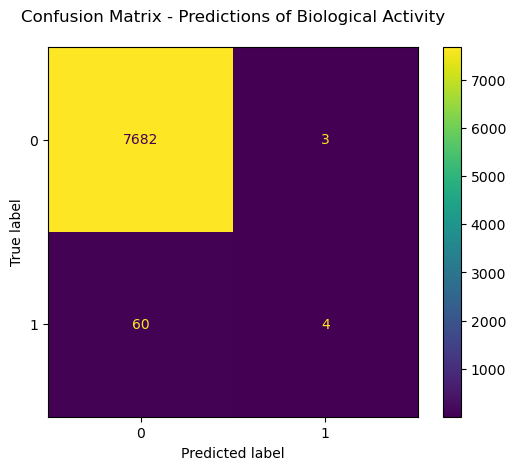

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

import matplotlib.pyplot as plt
plt.style.use('default')

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#cm = confusion_matrix(y_test, y_predict_test, labels=[0, 1], normalize='true')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                          display_labels=[0, 1])
#disp.plot()
ConfusionMatrixDisplay.from_estimator(model_list[0], X_test, y_test)
#plt.yticks(ticks = [0,1], labels=['Inactive', 'Active'])
#plt.xticks(ticks = [0,1], labels=['Inactive', 'Active'])
plt.title("Confusion Matrix - Predictions of Biological Activity\n")
plt.show()